# Artist Detail

In [1]:
%run ./wikipedia_setup.ipynb

In [2]:
import gensim
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

## Configure DB and Data Accessors

In [3]:
db = sqlite3.Connection("var/data/music.db")

## Explore

In [4]:
pd.read_sql("""
    select count(*)
    from artist
""", db)

,count(*)
0,11134


In [5]:
pd.read_sql("""
    select *
    from artist
    where
        (abs(random() % 10000000.0) / 10000000.0) <= 0.001
""", db)

,Artist,ArtistLink,ArtistDetailText
0,Duncan Sheik,https://en.wikipedia.org/wiki/Duncan_Sheik,\n \n \n \n Duncan Sheik - Wikipedia \n \n \n ...
1,Emilie Nicolas,https://en.wikipedia.org/wiki/Emilie_Nicolas,\n \n \n \n Emilie Nicolas - Wikipedia \n \n \...
2,Jeong Se-woon,https://en.wikipedia.org/wiki/Jeong_Se-woon,\n \n \n \n Jeong Se-woon - Wikipedia \n \n \n...
3,John Popper,https://en.wikipedia.org/wiki/John_Popper,\n \n \n \n John Popper - Wikipedia \n \n \n \...
4,Judy Tzuke,https://en.wikipedia.org/wiki/Judy_Tzuke,\n \n \n \n Judie Tzuke - Wikipedia \n \n \n \...
5,"Liar, Flower (KatieJane Garside and Chris Whit...",https://en.wikipedia.org/wiki/KatieJane_Garside,\n \n \n \n KatieJane Garside - Wikipedia \n \...
6,Magic!,https://en.wikipedia.org/wiki/Magic!,\n \n \n \n Magic! - Wikipedia \n \n \n \n \n ...
7,Mallory Knox,https://en.wikipedia.org/wiki/Mallory_Knox,\n \n \n \n Mallory Knox - Wikipedia \n \n \n ...
8,Matthew Good Band,https://en.wikipedia.org/wiki/Matthew_Good_Band,\n \n \n \n Matthew Good Band - Wikipedia \n \...
9,NCT 127,https://en.wikipedia.org/wiki/NCT_127,\n \n \n \n NCT 127 - Wikipedia \n \n \n \n \n...


In [6]:
pd.read_sql("""
    select
      min(length(ArtistDetailText)),
      max(length(ArtistDetailText)),
      avg(length(ArtistDetailText)),
      sum(length(ArtistDetailText))
    from artist
""", db)

,min(length(ArtistDetailText)),max(length(ArtistDetailText)),avg(length(ArtistDetailText)),sum(length(ArtistDetailText))
0,2634,239184,27635.887282,307697969


In [7]:
artists = pd.read_sql("select * from artist", db)

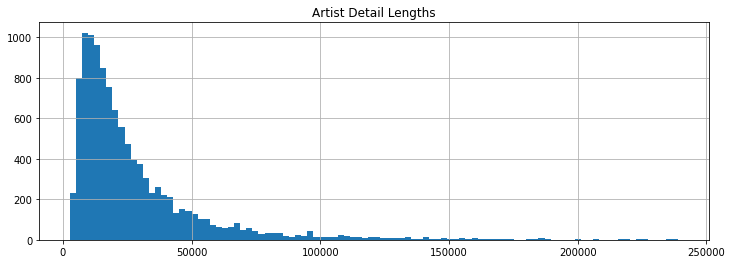

In [8]:
ad_lens = artists.ArtistDetailText.apply(len)

plt.figure(figsize=(12, 4))
plt.title("Artist Detail Lengths")
plt.hist(ad_lens, bins=100)
plt.grid(1)
plt.show()

In [9]:
ad_lens.describe().to_frame()

,ArtistDetailText
count,11134.000000
mean,27635.887282
std,26997.574700
min,2634.000000
25%,11457.000000
50%,18969.500000
75%,33125.750000
max,239184.000000


## Process Words

In [10]:
artists['DetailWords'] = artists.ArtistDetailText.apply(DetailWords.get_words)

In [11]:
wc = WordCounter()
wc.add_docs(artists['DetailWords'])

In [12]:
word_info = wc.get_word_info()

In [13]:
word_info

,Word,WordCount,DocCount,WordPercent,DocPercent,IDF
0,the,2023735,11134,5.192111,100.000000,-0.000090
1,and,863789,11134,2.216144,100.000000,-0.000090
2,in,812073,11134,2.083461,100.000000,-0.000090
3,of,735585,11134,1.887223,100.000000,-0.000090
4,on,588987,11134,1.511110,100.000000,-0.000090
...,...,...,...,...,...,...
363130,uphaus,1,1,0.000003,0.008981,8.624612
363131,thant,1,1,0.000003,0.008981,8.624612
363132,benenson,1,1,0.000003,0.008981,8.624612
363133,ennals,1,1,0.000003,0.008981,8.624612


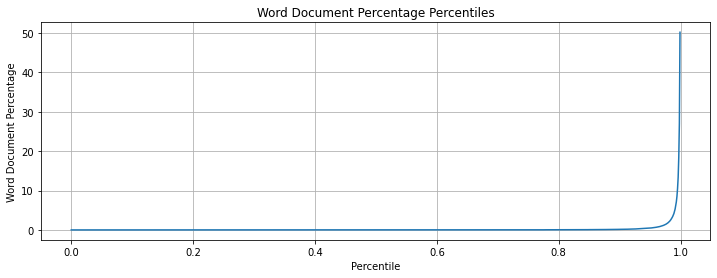

In [14]:
p = np.arange(0, 1, 0.001)
pv = word_info.DocPercent.quantile(p)

plt.figure(figsize=(12, 4))
plt.title("Word Document Percentage Percentiles")
plt.plot(p, pv)
plt.grid(1)
plt.xlabel("Percentile")
plt.ylabel("Word Document Percentage")
plt.show()

## Look at Some Stats On Words

There are so many words in the list. I am not sure that picking a range of those that fall into a doc percentage will give few enough words that TFIDF can be used well.


In [15]:
word_info[word_info.Word.isin({
    "rock",
    "country",
    "rap",
    "hop",
    "country",
    "jazz",
    "groove",
    "elvis",
    "nirvana",
    "psychadelic",
    "goodman"
})].sort_values(by='DocPercent', ascending=False)

,Word,WordCount,DocCount,WordPercent,DocPercent,IDF
48,rock,85723,8436,0.219932,75.767918,0.277377
146,country,29064,3466,0.074567,31.129872,1.166714
285,jazz,17374,2627,0.044575,23.594396,1.443780
464,hop,11811,2415,0.030302,21.690318,1.527890
570,rap,9715,1820,0.024925,16.346327,1.810618
1227,elvis,3704,1038,0.009503,9.322795,2.371745
2576,groove,1527,782,0.003918,7.023532,2.654626
2854,nirvana,1352,554,0.003469,4.975750,2.998791
3474,goodman,1060,505,0.002720,4.535657,3.091222


## Doc2Vec

Since the number of words is so large, I am looking to use doc2vec instead to control the number of features.



In [16]:
docs = []
for _, row in artists.iterrows():
    docs.append(TaggedDocument(row.DetailWords, [row.Artist]))

In [17]:
%%time
doc_model = Doc2Vec(docs, vector_size=50, epochs=10)

2021-10-30 18:21:18,026 - gensim.models.doc2vec - INFO - collecting all words and their counts
2021-10-30 18:21:18,029 - gensim.models.doc2vec - INFO - PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2021-10-30 18:21:22,335 - gensim.models.doc2vec - INFO - PROGRESS: at example #10000, processed 35069019 words (8144125/s), 342761 word types, 10000 tags
2021-10-30 18:21:22,906 - gensim.models.doc2vec - INFO - collected 363135 word types and 11134 unique tags from a corpus of 11134 examples and 38977116 words
2021-10-30 18:21:22,906 - gensim.models.word2vec - INFO - Creating a fresh vocabulary
2021-10-30 18:21:23,386 - gensim.utils - INFO - Doc2Vec lifecycle event {'msg': 'effective_min_count=5 retains 110427 unique words (30.40935189392375%% of original 363135, drops 252708)', 'datetime': '2021-10-30T18:21:23.386328', 'gensim': '4.1.2', 'python': '3.7.6 (tags/v3.7.6:43364a7ae0, Dec 19 2019, 00:42:30) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-

## Save Model

In [18]:
os.makedirs("var/models", exist_ok=True)

In [19]:
doc_model.save("var/models/artist_detail_model.d2v")

2021-10-30 18:24:46,162 - gensim.utils - INFO - Doc2Vec lifecycle event {'fname_or_handle': 'var/models/artist_detail_model.d2v', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-10-30T18:24:46.162166', 'gensim': '4.1.2', 'python': '3.7.6 (tags/v3.7.6:43364a7ae0, Dec 19 2019, 00:42:30) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'saving'}
2021-10-30 18:24:46,163 - gensim.utils - INFO - not storing attribute cum_table
2021-10-30 18:24:46,291 - gensim.utils - INFO - saved var/models/artist_detail_model.d2v


## Extract Artist Embeddings

In [20]:
artists['DetailEmbedding'] = artists.DetailWords.apply(lambda words: doc_model.infer_vector(words))

## Save Artist Embeddings

In [44]:
artists_save = artists[['Artist', 'ArtistLink', 'DetailEmbedding']].copy()
artists_save.DetailEmbedding = artists_save.DetailEmbedding.apply(lambda emb: ",".join(str(x) for x in emb))
artists_save.to_sql("artist_embedding", db, if_exists = 'replace', index = False)

In [45]:
cur = db.cursor()
cur.execute(f"""
   create unique index i_artist_embedding_artist on artist_embedding (Artist)
""")
db.commit()
cur.close()